# pyauric features
1. Manage AURIC batch runs
2. Read data from AURIC output files

The AURIC environment is handled through `AURICManager`. It will assume that you either have an `AURIC_ROOT` environment variable or that you keep auric in `~/auric`. If this is not the case or you want to run use another dierctory as the root, pass it as an argument.

In [1]:
import pyauric
auric = pyauric.AURICManager()

## AURIC batch run

`pyauric` can be used to set the input parameters for an AURIC batch run, which end up in the various `.inp` files. For example, here are some example parameters which produce a nightglow batch run.

In [2]:
print("AURIC input parameters:\n")
for line in auric.params:
    print("    ",line)

auric.runbatch();
print("\n\nLines computed in AURIC batch run:")
print("   ",auric.load("niteglo.ver").columns)

AURIC input parameters:

     Mandatory parameters:

     ['NALT', 100.0, 'number of altitude points']
     ['ZUB', 1000.0, 'upper bound of atmosphere (km)']
     ['YYDDD', 92080.0, 'year & day (YYDDD format)']
     ['UTSEC', 43200.0, 'universal time (sec)']
     ['GLAT', 30.0, 'latitude (deg)']
     ['GLON', 0.0, 'longitude (deg)']
     ['SCALE(N2)', 1.0, 'N2 density scale factor']
     ['SCALE(O2)', 1.0, 'O2 density scale factor']
     ['SCALE(O)', 1.0, 'O  density scale factor']
     ['SCALE(O3)', 1.0, 'O3 density scale factor']
     ['SCALE(NO)', 1.0, 'NO density scale factor']
     ['SCALE(N)', 1.0, 'N  density scale factor']
     ['SCALE(He)', 1.0, 'He density scale factor']
     ['SCALE(H)', 1.0, 'H  density scale factor']
     ['SCALE(Ar)', 1.0, 'Ar density scale factor']
     Derived parameters:

     ['GMLAT', 18.1, 'geomagnetic latitude (deg)']
     ['GMLON', 74.4, 'geomagnetic longitude (deg)']
     ['DPANG', 41.24, 'magnetic dip angle (deg)']
     ['SZA', 30.0, 'solar zeni

### Change parameters
Suppose we meant to do a daytime run instead. We can change the UTC to noon like this:

In [3]:
auric.set_params({"UTSEC":12*3600})
print(auric.params[4])

['UTSEC', 43200.0, 'universal time (sec)']


**Currently, this will not work because we need to run geoparm in the auric root in order to get the derived parameters out.**

Work on this tomorrow.

Running the batch script again will produce dayglow instead.

In [4]:
auric.runbatch();
print("\n\nLines computed in AURIC batch run:")
print("   ",auric.load("dayglo.ver").columns)



Lines computed in AURIC batch run:
    Index(['1356 A (final)', 'Ar+e 1048 A (initial)', 'Ar+e 1066 A (initial)',
       'N(2Do) hv 5200 A', 'N(2Po) hv 3466 A', 'N+e 1135 A (initial)',
       'N+e 1199 A (initial)', 'N+e 1493 A', 'N+e 1743 A', 'N2(A) hv N2 VK',
       'N2+(HP+H)+hv  862 A', 'N2+(HP+H)+hv  870 A', 'N2+(HP+H)+hv  876 A',
       'N2+(HP+H)+hv  887 A', 'N2+(HP+H)+hv  906 A', 'N2+(HP+H)+hv  910 A',
       'N2+(HP+H)+hv  916 A', 'N2+(HP+H)+hv  953 A', 'N2+(HP+H)+hv  964 A',
       'N2+(HP+H)+hv 1043 A', 'N2+(HP+H)+hv 1054 A', 'N2+(HP+H)+hv 1068 A',
       'N2+(HP+H)+hv 1085 A', 'N2+(HP+H)+hv 1098 A', 'N2+(HP+H)+hv 1100 A',
       'N2+(HP+H)+hv 1134 A', 'N2+(HP+H)+hv 1168 A', 'N2+(HP+H)+hv 1177 A',
       'N2+(HP+H)+hv 1200 A', 'N2+(HP+H)+hv 1243 A', 'N2+(HP+H)+hv 1310 A',
       'N2+(HP+H)+hv 1319 A', 'N2+(HP+H)+hv 1327 A', 'N2+(HP+H)+hv 1412 A',
       'N2+(HP+H)+hv 1493 A', 'N2+(HP+H)+hv 1743 A', 'N2+(HP+H)+hv 2139 A',
       'N2+(HP+H)+hv 2143 A', 'N2+e 1085 A', 'N2+e 1

## Reading AURIC files
AURIC's files can be loaded into a dictionary or data frame with `AURICManager.load(filename)`. Filenames should be relative to the AURIC root.

In [5]:
ni = auric.load("niteglo.int")
nv = auric.load("niteglo.ver")

Data loaded in this way will define a title and ylabel for plotting.

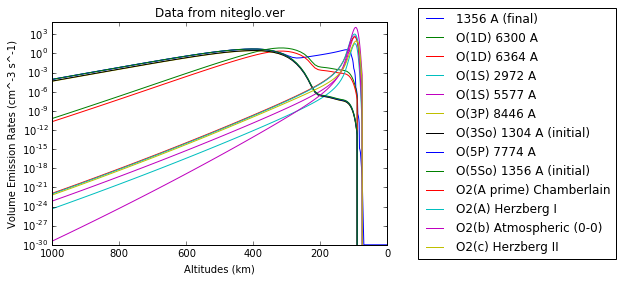

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
def outside_legend(ax):
    return ax.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))

nv.plot()
lgd = outside_legend(plt.gca())
plt.yscale('log')
plt.title(nv.title)
plt.ylabel(nv.ylabel);

We can use list comprehensions to pick out different types features to look at.

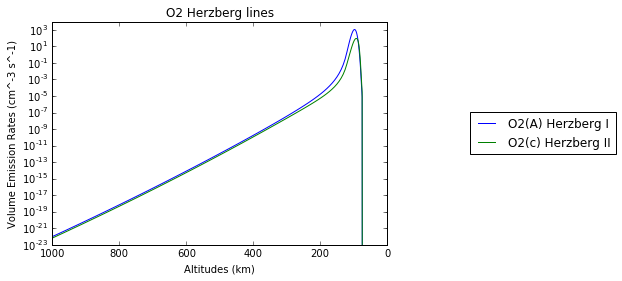

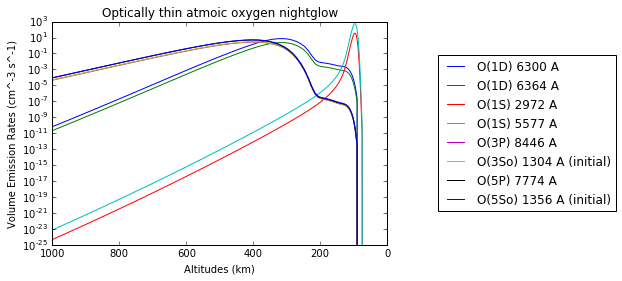

In [7]:
herzberg = [ c for c in nv.columns if "Herzberg" in c ]

nv[herzberg].plot()
plt.yscale('log')
outside_legend(plt.gca())
plt.ylabel(nv.ylabel)
plt.title("O2 Herzberg lines");

thin_O = [ c for c in nv.columns if "O2" not in c and "final" not in c ]

nv[thin_O].plot()
plt.yscale('log')
outside_legend(plt.gca())
plt.ylabel(nv.ylabel)
plt.title("Optically thin atmoic oxygen nightglow");